<a href="https://colab.research.google.com/github/Moinuddinsk01/CodeWay-Tasks/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
data = pd.read_csv("/content/Churn_Modelling.csv")

Performing EDA to get insights from the data

In [13]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.shape

(10000, 14)

In [15]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

So there are no nulls and the features`[RowNumber, CustomerId, Surname]` are not that required for training

In [17]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


We have some object type values. So we have to convert categorical values to numerical value.


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

feature_names = data.columns.values

for name in feature_names:
  if data[name].dtype =='object':
    data[name] = le.fit_transform(data[name])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


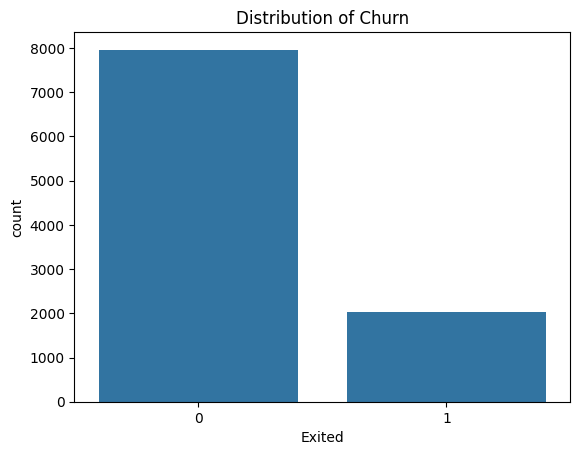

In [24]:
# Check the distribution of the target variable (Churn)
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churn')
plt.show()

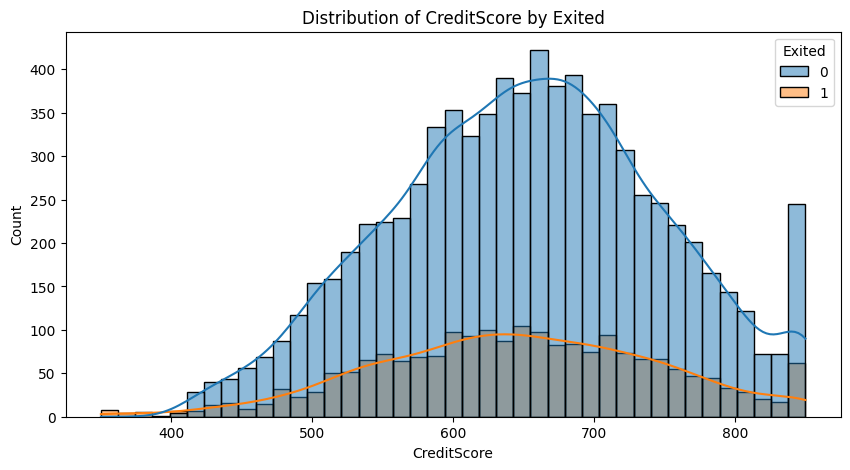

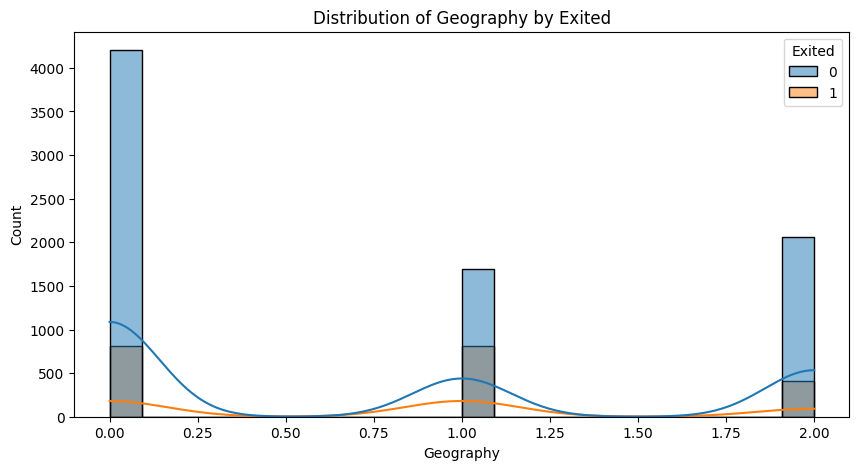

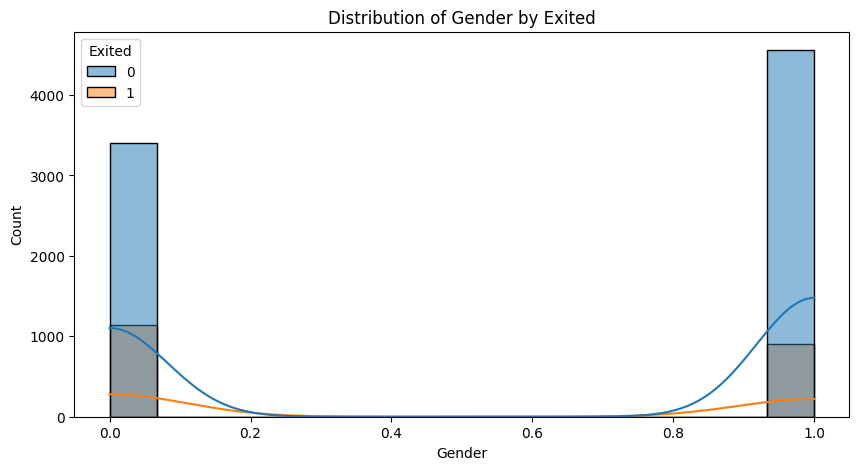

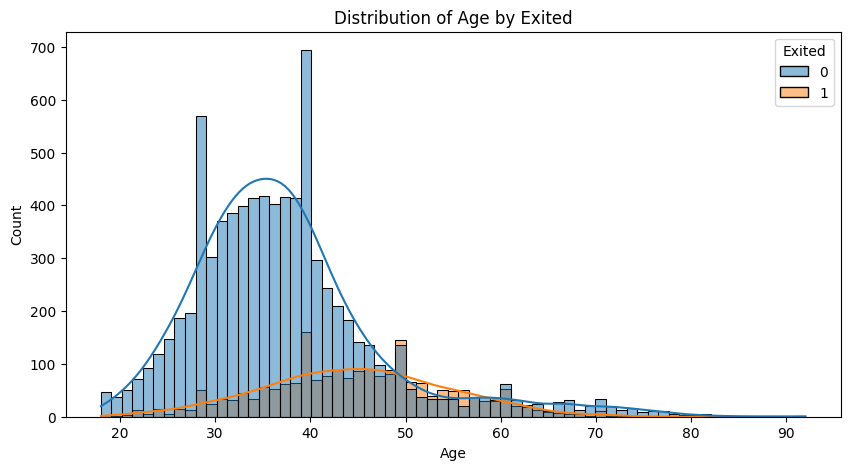

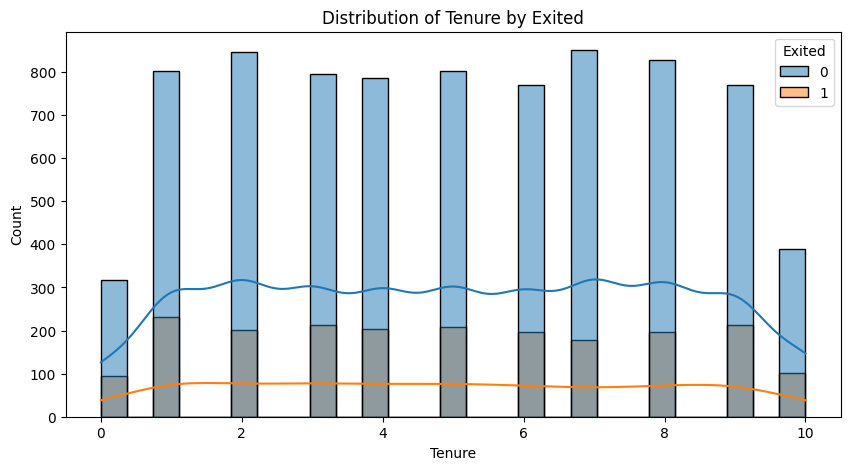

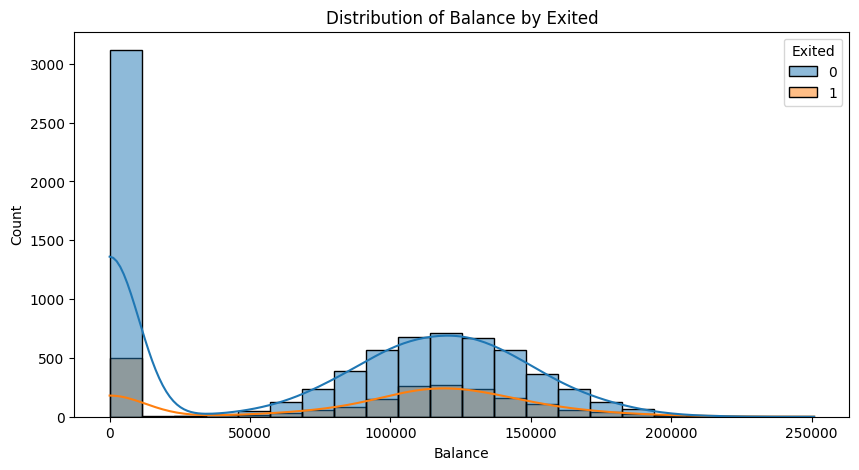

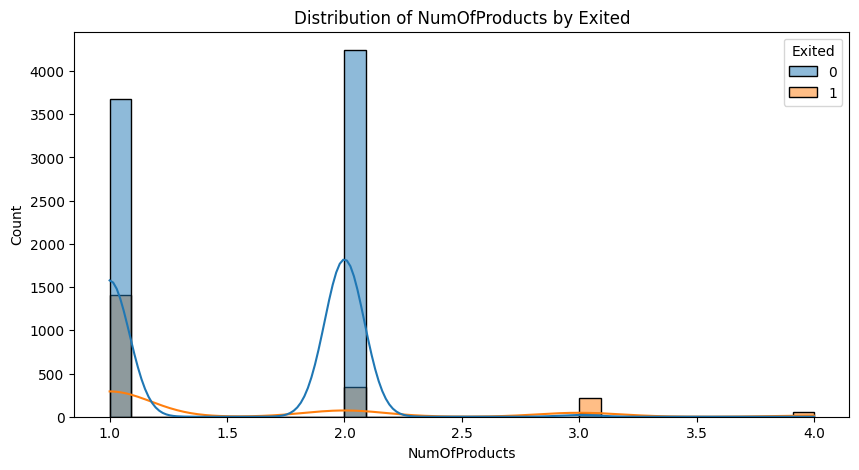

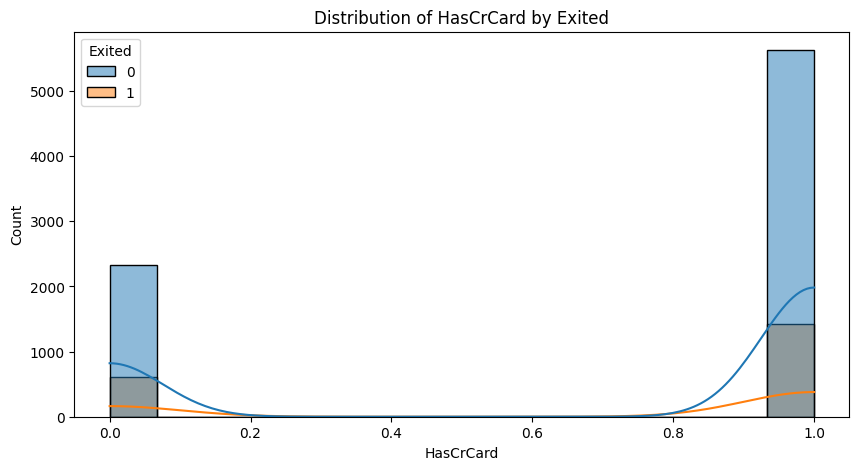

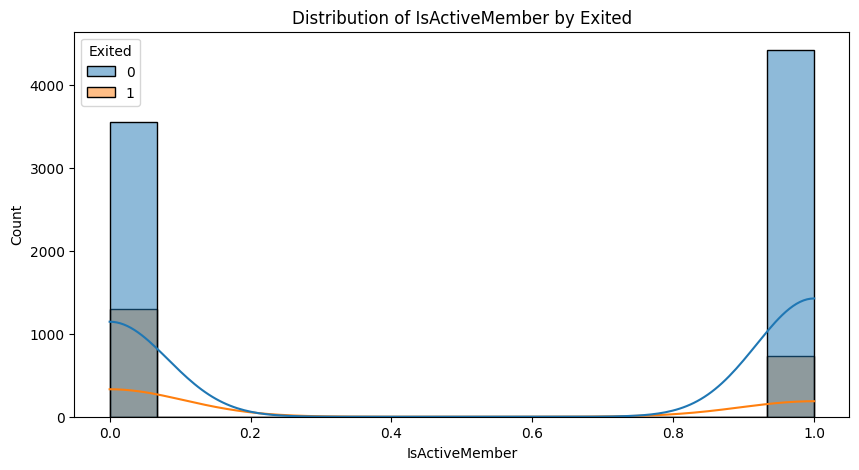

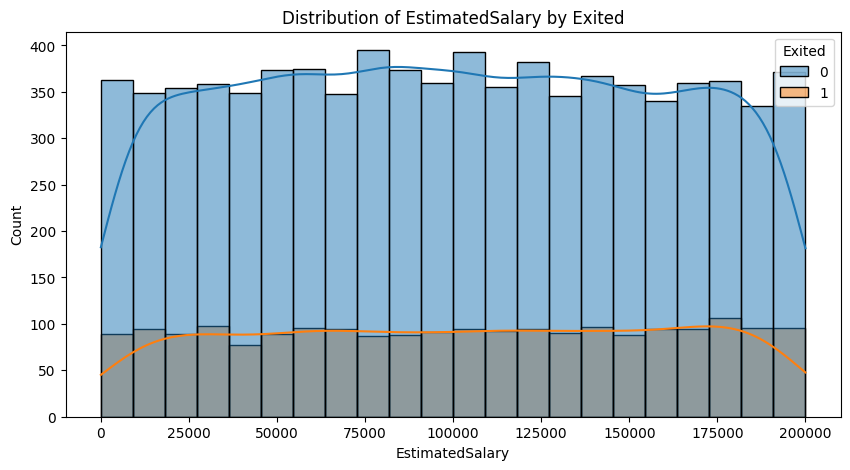

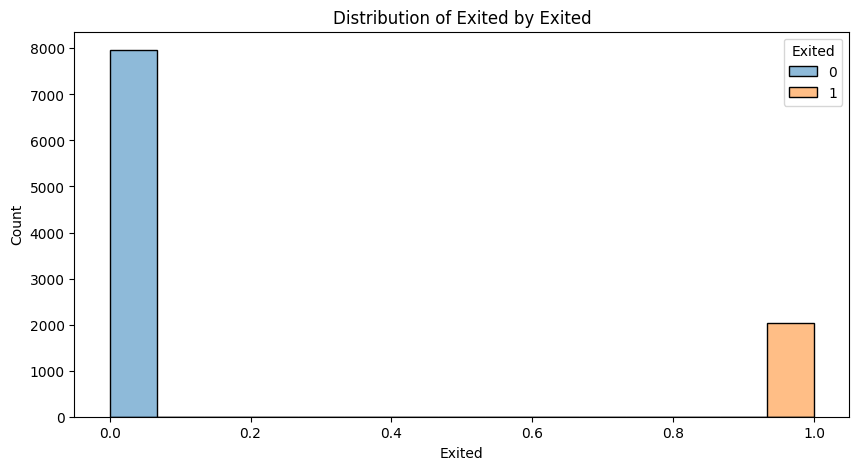

In [36]:
# Visualize the distribution of numerical features for both classes
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=feature, hue='Exited', kde=True)
    plt.title(f'Distribution of {feature} by Exited')
    plt.show()

In [25]:
corr = data.corr()
corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


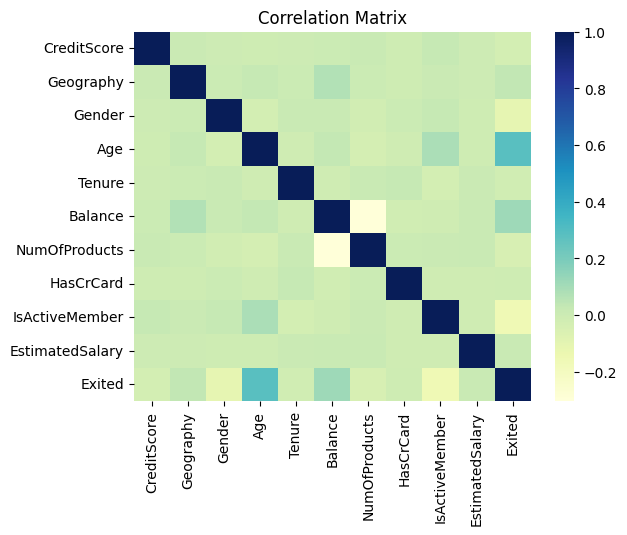

In [28]:
sns.heatmap(corr, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [29]:
corr.abs()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,0.002857,0.003965,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,0.008523,0.006724,0.001369,0.035943
Gender,0.002857,0.004719,1.000000,0.027544,0.014733,0.012087,0.021859,0.005766,0.022544,0.008112,0.106512
Age,0.003965,0.022812,0.027544,1.000000,0.009997,0.028308,0.030680,0.011721,0.085472,0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,0.009997,1.000000,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001
Balance,0.006268,0.069408,0.012087,0.028308,0.012254,1.000000,0.304180,0.014858,0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,0.021859,0.030680,0.013444,0.304180,1.000000,0.003183,0.009612,0.014204,0.047820
HasCrCard,0.005458,0.008523,0.005766,0.011721,0.022583,0.014858,0.003183,1.000000,0.011866,0.009933,0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,0.028362,0.010084,0.009612,0.011866,1.000000,0.011421,0.156128
EstimatedSalary,0.001384,0.001369,0.008112,0.007201,0.007784,0.012797,0.014204,0.009933,0.011421,1.000000,0.012097


Since the upper triangle and lower triangle matrices are same, we shall consider any one of them.

In [32]:
upper_matrix = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
upper_matrix.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,NaN,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,NaN,NaN,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,NaN,NaN,NaN,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,NaN,NaN,NaN,NaN,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,NaN,NaN,NaN,NaN,NaN,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001


In [33]:
drop_columns = [col for col in upper_matrix if any(upper_matrix[col]>0.65)]
print(drop_columns)

[]


So we can conclude that there no such highly correlated features.

Feature Selection

In [34]:
X = data.drop('Exited', axis=1)
y= data.Exited

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [43]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [44]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

In [51]:
# KNN classifier
knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [45]:
# Evaluating Model
def evaluating_model(model, predictions):
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [52]:
# Evaluate each model
evaluating_model(logistic_model, logistic_predictions)
print("-------------------")
evaluating_model(random_forest_model, random_forest_predictions)
print("-------------------")
evaluating_model(gradient_boosting_model, gradient_boosting_predictions)
print("-------------------")
evaluating_model(knn, knn_predictions)

Model: LogisticRegression
Accuracy: 0.815
Confusion Matrix:
[[1559   48]
 [ 322   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

-------------------
Model: RandomForestClassifier
Accuracy: 0.864
Confusion Matrix:
[[1547   60]
 [ 212  181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

-------------------
Model: GradientBoostingClassifier
Accuracy: 0.8655
Confusion Matrix:
[[1547   60]


Among `[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, KNeighborsClassifier]`, `GradientBoostingClassifier` works well for this.